In [115]:
import pandas as pd
import pickle as pkl
import numpy as np

In [116]:
df = pd.read_csv('/home/joaomorado/test/a/DESS66x8.csv')

In [117]:
monomer_a = "O"
monomer_b = "c1ccccc1"
df_mol = df.loc[(df["smiles0"] == monomer_a) & (df["smiles1"] == monomer_b)]
df_mol.keys()


Index(['smiles0', 'smiles1', 'charge0', 'charge1', 'natoms0', 'natoms1',
       'system_id', 'group_orig', 'group_id', 'k_index', 'geom_id', 'cc_basis',
       'cc_HF', 'cc_MP2_os', 'cc_MP2_ss', 'cc_CCSD_os', 'cc_CCSD_ss', 'cc_(T)',
       'cc_[T]', 'cc_MP2_all', 'cc_CCSD(T)_all', 'cc_delta_CCSD(T)', 'qz_HF',
       'qz_MP2_os', 'qz_MP2_ss', 'qz_MP2_all', 'tz_HF', 'tz_MP2_os',
       'tz_MP2_ss', 'tz_MP2_all', 'cbs_MP2_os', 'cbs_MP2_ss', 'cbs_MP2_all',
       'cbs_CCSD(T)_all', 'espx_HF_es', 'espx_HF_hl', 'espx_HF_ovl',
       'espx_MP2_es', 'espx_MP2_ovl', 'sapt_es', 'sapt_ex', 'sapt_exs2',
       'sapt_ind', 'sapt_exind', 'sapt_disp', 'sapt_exdisp_os',
       'sapt_exdisp_ss', 'sapt_delta_HF', 'sapt_all', 'nn_CCSD(T)_all',
       'nn_CCSD(T)_all_05', 'nn_CCSD(T)_all_95', 'xyz', 'elements',
       'reference', 'system_name'],
      dtype='object')

In [118]:
data_dict = {
    "xyz_qm": [],
    "xyz_mm": [],
    "z": [],
    "charges_mm": [],
    "e_int": [],
    "solute_mask": [],
    "solvent_mask": [],
    "sapt_ind": [],
    "sapt_disp": [],
    "sapt_exch": [],
    "sapt_all": []
}

energies = []
for i in range(len(df_mol)):
    xyz_dimer = np.asarray(df_mol.iloc[i]["xyz"].split(" "), dtype=float).reshape(-1,3)

    data_dict["xyz_mm"].append(xyz_dimer[:3] * 0.1)
    data_dict["xyz_qm"].append(xyz_dimer[3:] * 0.1)
    data_dict["z"].append([6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1])
    data_dict["charges_mm"].append([-0.834, 0.417, 0.417])
    data_dict["e_int"].append(df_mol.iloc[i]["cbs_CCSD(T)_all"] * 4.184)
    data_dict["solute_mask"].append(np.asarray([True] * 12 + [False] * 3))
    data_dict["solvent_mask"].append(np.asarray([False] * 12 + [True] * 3))
    data_dict["sapt_ind"].append(df_mol.iloc[i]["sapt_ind"] * 4.184 + df_mol.iloc[i]["sapt_exind"] * 4.184)
    data_dict["sapt_disp"].append(df_mol.iloc[i]["sapt_disp"] * 4.184 + df_mol.iloc[i]["sapt_exdisp_os"] * 4.184 + df_mol.iloc[i]["sapt_exdisp_ss"] * 4.184)
    data_dict["sapt_exch"].append(df_mol.iloc[i]["sapt_ex"] * 4.184 + df_mol.iloc[i]["sapt_exs2"] * 4.184)
    data_dict["sapt_all"].append(df_mol.iloc[i]["sapt_all"] * 4.184)


In [119]:
with open('/home/joaomorado/test/a/water-benzene-sapt.pkl', 'wb') as f:
    pkl.dump(data_dict, f)

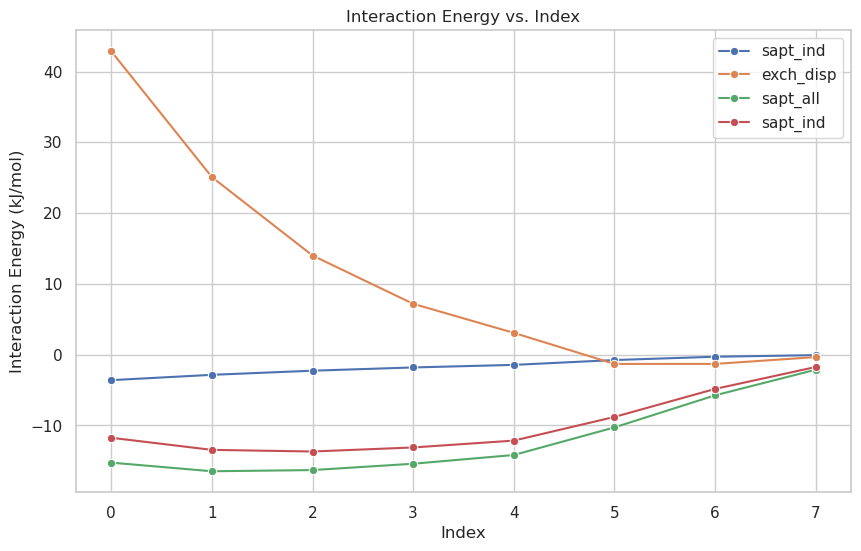

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#induction
sns.lineplot(x=range(len(data_dict["sapt_all"])), y=data_dict["sapt_ind"], marker='o', label='sapt_ind')

exch_disp = np.array(data_dict["sapt_exch"]) + np.array(data_dict["sapt_disp"])
sns.lineplot(x=range(len(data_dict["sapt_all"])), y=exch_disp, marker='o', label='exch_disp')

sns.lineplot(x=range(len(data_dict["sapt_all"])), y=data_dict["sapt_all"], marker='o', label='sapt_all')
sns.lineplot(x=range(len(data_dict["e_int"])), y=data_dict["e_int"], marker='o', label='sapt_ind')
plt.xlabel('Index')
plt.ylabel('Interaction Energy (kJ/mol)')
plt.title('Interaction Energy vs. Index')
plt.show()

NameError: name '_torch' is not defined

In [122]:
import scipy.io
data = scipy.io.loadmat('/home/joaomorado/test/a/ligand_plot_data.mat')

for key in data:
    if '__' not in key:
        data[key] /= 1

0.7087679712798218
[0.64484652 0.66517114 0.68208529 0.69716313 0.71096242 0.74337439
 0.76507024 0.76147064]


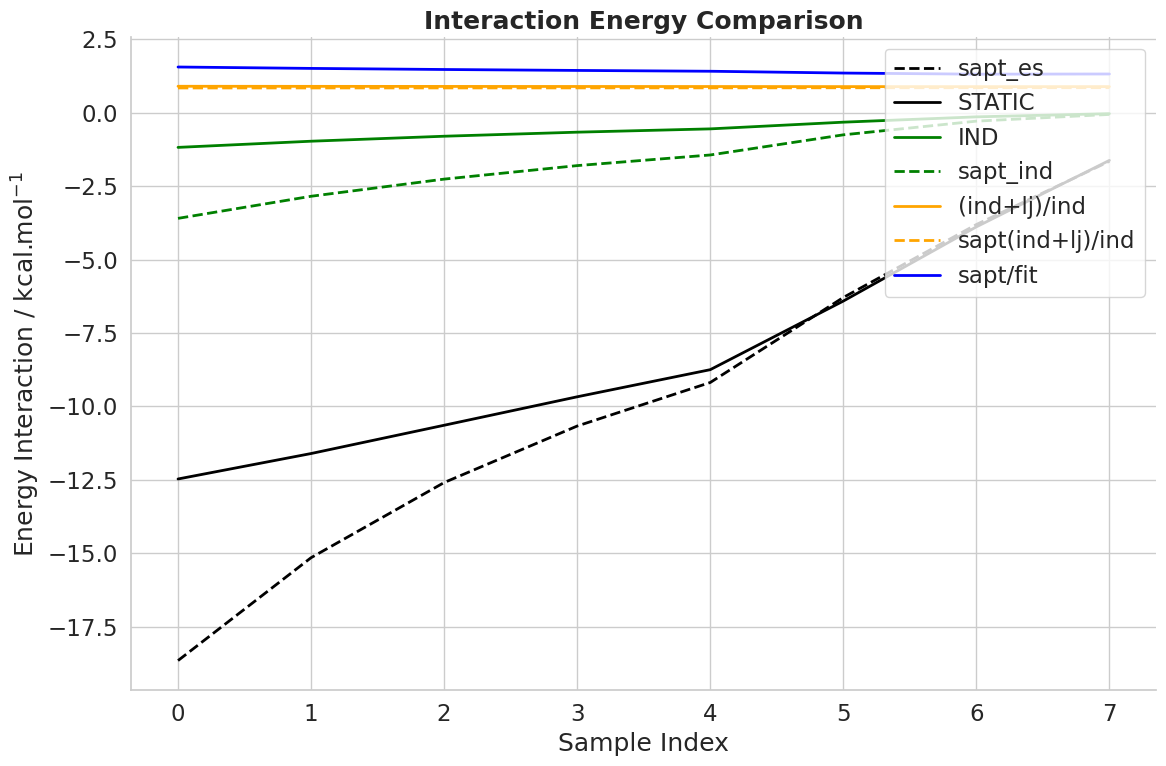

In [151]:
sns.set(style="whitegrid", palette="muted", font_scale=1.5)

plt.figure(figsize=(12, 8))

x = np.arange(len(data["e_int_fitted"][0]))
# Plot line and scatter plot for the target, predicted, and fitted values

# Static electrostatics
plt.plot(x,df_mol["sapt_es"] * 4.184, label='sapt_es', lw=2, linestyle='--', color='black')
plt.plot(x,data["e_static_fitted"][0], label='STATIC', lw=2, color='black')

# Induction
plt.plot(x,data["e_ind_fitted"][0], label='IND', lw=2, color="green")
plt.plot(x,(df_mol["sapt_ind"] + df_mol["sapt_exind"]) * 4.184, label='sapt_ind', lw=2, linestyle='--', color='green')

# LJ
#plt.plot(x,data["e_lj_fitted"][0], label='LJ', lw=2, color="red")
#disp_exch = np.array(df_mol["sapt_disp"]) + np.array(df_mol["sapt_exdisp_os"]) + np.array(df_mol["sapt_exdisp_ss"]) + np.array(df_mol["sapt_ex"]) + np.array(df_mol["sapt_exs2"])
#plt.plot(x,disp_exch*4.184, label='sapt_disp', lw=2, linestyle='--', color="red")

ratio1 = data["e_lj_fitted"][0] / (data["e_ind_fitted"][0] + data["e_lj_fitted"][0]) 
plt.plot(x, ratio1, label='(ind+lj)/ind', lw=2, color="orange")

disp = np.array(df_mol["sapt_disp"]) + np.array(df_mol["sapt_exdisp_os"]) + np.array(df_mol["sapt_exdisp_ss"]) 
disp = disp * 4.184
ind = np.array(df_mol["sapt_ind"]) + np.array(df_mol["sapt_exind"])
ind = ind * 4.184
elec = np.array(df_mol["sapt_es"]) * 4.184
ratio2 = disp / (disp + ind)

plt.plot(x, ratio2, label='sapt(ind+lj)/ind', lw=2, color="orange", linestyle='--')

# Plot the ratio

ratio_sapt_elec = ind / (disp + ind)
ratio_fitted_elec = data["e_ind_fitted"][0] / (data["e_ind_fitted"][0] + data["e_lj_fitted"][0])

plt.plot(x, ratio_sapt_elec / ratio_fitted_elec, label='sapt/fit', lw=2, color="blue")
print(np.mean(ratio_fitted_elec / ratio_sapt_elec))
print(ratio_fitted_elec / ratio_sapt_elec)




plt.title('Interaction Energy Comparison', fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Energy Interaction / kcal.mol$^{-1}$')
plt.legend(loc='upper right')

# Increase freequency of yticks
#plt.yticks(np.arange(-4.5, 1, 0.5))

sns.despine()
plt.tight_layout()
plt.show()
